In [1]:
#!pip install scipy==1.12

In [2]:
# Import necessary libraries
from numpy import triu
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re
from gensim.models import Word2Vec
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matteorigat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matteorigat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Define the list of cooking techniques
TECHNIQUES_LIST = [
    'bake', 'boil', 'braise', 'broil', 'fry', 'grill', 'roast', 'saute', 'simmer',
    'steam', 'stew'
]

# Define a new technique mapping based on TECHNIQUES_LIST
technique_mapping = {
    'bake': 'bake',
    'barbecue': 'grill',
    'blanch': 'boil',
    'blend': 'combine',
    'boil': 'boil',
    'braise': 'braise',
    'brine': 'marinate',
    'broil': 'broil',
    'caramelize': 'saute',
    'combine': 'combine',
    'crock pot': 'slow cook',
    'crush': 'puree',
    'deglaze': 'saute',
    'devein': 'prepare',
    'dice': 'prepare',
    'distill': 'boil',
    'drain': 'boil',
    'emulsify': 'mix',
    'ferment': 'bake',
    'freeze': 'refrigerate',
    'fry': 'fry',
    'grate': 'saute',
    'griddle': 'prepare',
    'grill': 'grill',
    'knead': 'prepare',
    'leaven': 'bake',
    'marinate': 'marinate',
    'mash': 'stew',
    'melt': 'melt',
    'microwave': 'stew',
    'parboil': 'bake',
    'pickle': 'pickling',
    'poach': 'stew',
    'pour': 'combine',
    'pressure cook': 'bake',
    'puree': 'puree',
    'refrigerate': 'refrigerate',
    'roast': 'roast',
    'saute': 'saute',
    'scald': 'fry',
    'scramble': 'combine',
    'shred': 'puree',
    'simmer': 'simmer',
    'skillet': 'saute',
    'slow cook': 'slow cook',
    'smoke': 'grill',
    'smooth': 'stew',
    'soak': 'bake',
    'sous-vide': 'combine',
    'steam': 'steam',
    'stew': 'stew',
    'strain': 'bake',
    'tenderize': 'fry',
    'thicken': 'boil',
    'toast': 'grill',
    'toss': 'stew',
    'whip': 'grill',
    'whisk': 'stew'
}

In [4]:
file_path = "../dataset/RAW_merged.csv"
data = pd.read_csv(file_path)

In [5]:
# # Function to convert one-hot encoded techniques back to list format
# def one_hot_to_list(row):
#     techniques_one_hot = eval(row['techniques'])
#     techniques_list = [TECHNIQUES_LIST[i] for i, val in enumerate(techniques_one_hot) if val == 1]
#     return techniques_list
# 
# # Apply the function to each row to convert one-hot encoded techniques to list format
# data['techniques'] = data.apply(one_hot_to_list, axis=1)

In [6]:
# Initialize lists to store raw ingredients and techniques
raw_ingredients = []
raw_techniques = []

# Extract ingredients and techniques from each recipe
for index, row in data.iterrows():
    ingredients = eval(row['ingredients'])
    raw_ingredients.extend(ingredients)

    techniques = eval(row['techniques_list'])
    raw_techniques.extend(techniques)

In [7]:
# Clean out non-letter or space symbols and collapse the list into a collection of ingredients
# regex = re.compile('[^a-zA-Z ]')
# ingredients_full = [regex.sub('', item.lower()).strip() for item in raw_ingredients]
# raw_ingredients = np.unique(ingredients_full)
# print(len(raw_ingredients))
# for item in raw_ingredients:
#    print(item)

In [8]:
# Look at words in the data to clean unnecessary differentiators
# words=[x for item in raw_ingredients for x in item.split(' ') if len(x)>1]
# for word in words:
#    print(word)

In [9]:
# Construct a frequence dictionary and create a dataset of words to drop
# uniqueFrequencies = {i:words.count(i) for i in words}
# dropWords=[k for k in uniqueFrequencies.keys() if uniqueFrequencies[k]==1]\
# +['yellow','black','red','green','white','purple','cloves','and','cook','drain','allpurpose','purpose','all','pitted','crumbles','powder', 'whole', 'extract', 'sweet', 'baby', 'bakin', 'brow', 'canned', 'celery']
# len(dropWords)

In [10]:
# Count frequencies of ingredients and techniques
ingredient_counts = Counter(raw_ingredients)
technique_counts = Counter(raw_techniques)

In [11]:
# Print out statistics
print('Total number of unique ingredients:', len(ingredient_counts))
print('Total number of unique techniques:', len(technique_counts))

# Example of how to print the most common ingredients
print('\nTop most common ingredients:')
for ingredient, count in ingredient_counts.most_common(5):
    print(f'{ingredient}: {count}')

# Example of how to print the most common techniques
print('\nTop most common techniques:')
for technique, count in technique_counts.most_common(5):   #57 in total
    print(f'{technique}: {count}')

# # Assuming you also want to print out the distribution of cuisines based on the number of steps
# steps_counts = Counter(data['steps'].apply(lambda x: len(eval(x))))
# print('\nDistribution of recipes based on number of steps:')
# for steps, count in steps_counts.items():
#     print(f'{steps} steps: {count} recipes')


Total number of unique ingredients: 13627
Total number of unique techniques: 57

Top most common ingredients:
salt: 66469
butter: 43862
sugar: 33884
onion: 31624
water: 25953

Top most common techniques:
bake: 64821
combine: 60136
pour: 48747
boil: 42354
melt: 30865


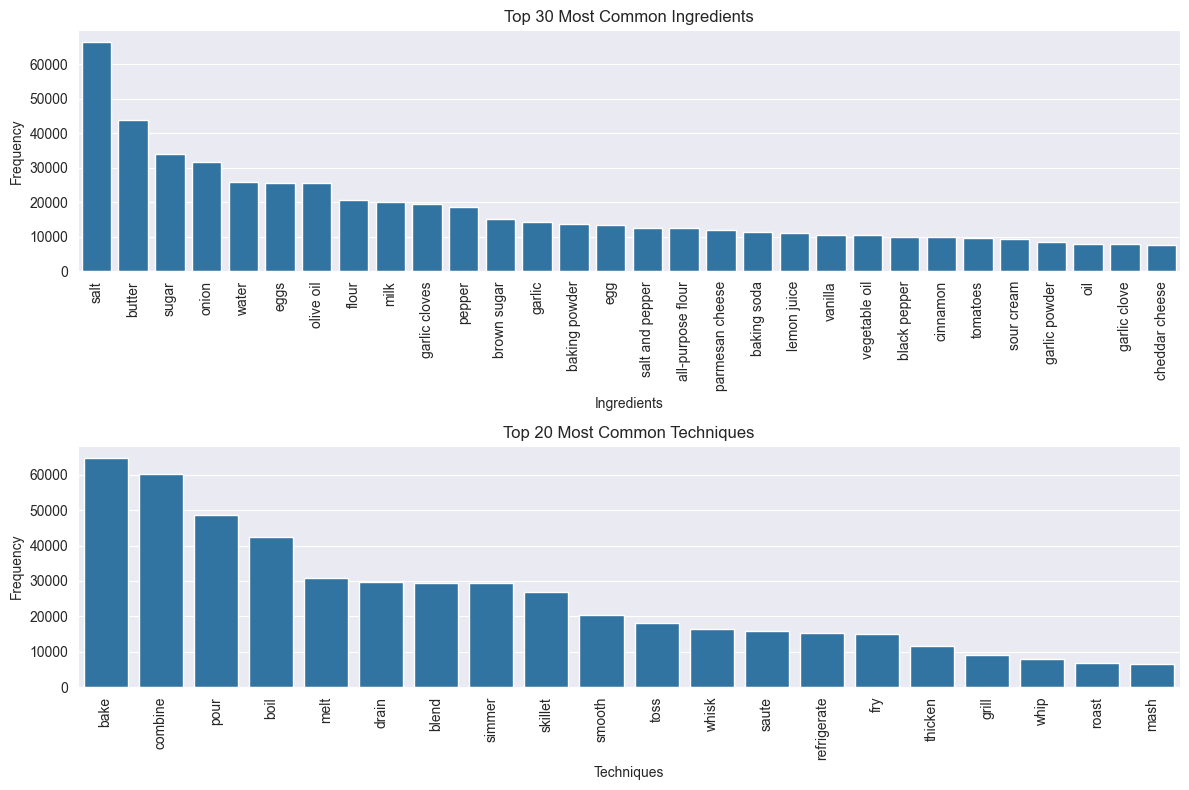

In [12]:
# Plotting the first bar plot for ingredients
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.subplot(2, 1, 1)  # Create subplot 1 (rows, columns, plot_number)
x_cu = [cu for cu, frq in ingredient_counts.most_common(30)]
y_frq = [frq for cu, frq in ingredient_counts.most_common(30)]
fbar = sns.barplot(x=x_cu, y=y_frq)
plt.xticks(rotation=90)  # Rotate x-axis labels

# Adding labels and title for the first subplot
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Ingredients')

# Plotting the second bar plot for techniques
plt.subplot(2, 1, 2)  # Create subplot 2 (rows, columns, plot_number)
x_cu2 = [cu for cu, frq in technique_counts.most_common(20)]
y_frq2 = [frq for cu, frq in technique_counts.most_common(20)]
fbar2 = sns.barplot(x=x_cu2, y=y_frq2)
plt.xticks(rotation=90)  # Rotate x-axis labels

# Adding labels and title for the second subplot
plt.xlabel('Techniques')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Techniques')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [13]:
sentences = []
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
regex = re.compile('[^a-zA-Z ]')

# Define common ingredients to filter out
#common_ingredients_to_avoid = ['salt', 'sugar', 'water', 'pepper', 'butter', 'onion', 'garlic', 'oil', 'parsley']
common_ingredients_to_avoid = []

# Function to clean and filter ingredients
def clean_ingredient(ingredient):
    cleaned_ingredient = regex.sub('', ingredient.lower()).strip()
    cleaned_words = []
    
    for word in cleaned_ingredient.split():
        if word in common_ingredients_to_avoid:
            cleaned_words = []
            break
        elif len(word) > 2 and word not in stop_words:
            cleaned_words.append(lemmatizer.lemmatize(word))
    
    return cleaned_words

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    clean_recipe = []
    ingredients = eval(row['ingredients'])
    
    for ingredient in ingredients:
        cleaned_words = clean_ingredient(ingredient)
        if cleaned_words:  # Check if cleaned_words is not empty
            clean_recipe.append(" ".join(cleaned_words))
        
    sentences.append(clean_recipe)

# Print the number of recipes processed
print(f"Number of recipes cleaned: {len(sentences)}")
print(sentences[:5])

Number of recipes cleaned: 178265
[['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt'], ['prepared pizza crust', 'sausage patty', 'egg', 'milk', 'salt pepper', 'cheese'], ['spreadable cheese garlic herb', 'new potato', 'shallot', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper'], ['milk', 'vanilla ice cream', 'frozen apple juice concentrate', 'apple'], ['fennel seed', 'green olive', 'ripe olive', 'garlic', 'peppercorn', 'orange rind', 'orange juice', 'red chile', 'extra virgin olive oil']]


In [14]:
# from gensim.models.phrases import Phraser, Phrases
# 
# # Flatten the list of lists to feed into bigram/trigram models
# flattened_sentences = [ingredient.split() for sublist in sentences for ingredient in sublist]
# 
# # Apply bigram and trigram models using Gensim's Phrases
# bigram = Phrases(flattened_sentences, min_count=2, threshold=0.01)
# trigram = Phrases(bigram[flattened_sentences], min_count=5, threshold=0.01)
# 
# # Convert bigram and trigram models to more efficient Phrasers
# bigram_phraser = Phraser(bigram)
# trigram_phraser = Phraser(trigram)
# 
# print(bigram)
# print(trigram)
# for i in range(10):
#     print(bigram_phraser[flattened_sentences[i]])
#     print(trigram_phraser[bigram_phraser[flattened_sentences[i]]])
# 
# # Apply bigram and trigram models to the corpus
# tokenized_corpus = [trigram_phraser[bigram_phraser[ingredient]] for ingredient in flattened_sentences]

In [15]:
# Flatten the list of lists
flattened_sentences = [ingredient for sublist in sentences for ingredient in sublist]
print(flattened_sentences[:5])
# Tokenize each ingredient (assuming simple split by space)
tokenized_corpus = [ingredient.split() for ingredient in flattened_sentences]
print(tokenized_corpus[:5])

['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter']
[['winter', 'squash'], ['mexican', 'seasoning'], ['mixed', 'spice'], ['honey'], ['butter']]


In [16]:
# Set values for Word2Vec parameters
num_features = 100      # Example dimensionality of word vectors
min_word_count = 2     # Consider all words, even if they appear only once
num_workers = 1        # Number of threads to run in parallel
context = 5            # Context window size

# Train the Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=num_features, min_count=min_word_count, workers=num_workers, window=context, epochs=10, sg=1)

# # Create a dictionary to store word vectors
# ingredient_vectors = {}
# for ingredient in flattened_sentences:
#     words = ingredient  # Now `ingredient` is already tokenized
#     valid_words = [model.wv[word] for word in words if word in model.wv]
#     if valid_words:
#         ingredient_vectors[" ".join(words)] = np.mean(valid_words, axis=0)
# 
# # Normalize the vectors using MinMaxScaler
# #scaler = MinMaxScaler()
# #scaled_vectors = scaler.fit_transform(list(ingredient_vectors.values()))

print(list(model.wv.key_to_index.keys())[:20])

['pepper', 'salt', 'sugar', 'onion', 'oil', 'cheese', 'fresh', 'garlic', 'butter', 'egg', 'ground', 'flour', 'powder', 'cream', 'olive', 'sauce', 'chicken', 'juice', 'water', 'tomato']


In [17]:
def similarity(word1, word2):
    words1 = word1.split()
    words2 = word2.split()
    return model.wv.n_similarity(words1, words2)

In [18]:
# Example to find similarity between two ingredients with names included
print(f"Similarity between 'oil' and 'oil': {similarity('oil', 'oil')}")
print(f"Similarity between 'chicken' and 'beef': {similarity('chicken', 'beef')}")
print(f"Similarity between 'spaghetti' and 'pasta': {similarity('spaghetti', 'pasta')}")
print(f"Similarity between 'tomato' and 'rum': {similarity('tomato', 'rum')}")
print(f"Similarity between 'oil' and 'butter': {similarity('oil', 'butter')}")
print(f"Similarity between 'olive oil' and 'butter': {similarity('olive oil', 'butter')}")
print(f"Similarity between 'olive oil' and 'oil': {similarity('olive oil', 'oil')}")
print()
print(f"Similarity between 'salt' and 'pepper': {similarity('salt', 'pepper')}")           # Common seasoning
print(f"Similarity between 'milk' and 'cream': {similarity('milk', 'cream')}")             # Related dairy products
print(f"Similarity between 'bread' and 'toast': {similarity('bread', 'toast')}")             # Bread-related
print(f"Similarity between 'carrot' and 'broccoli': {similarity('carrot', 'broccoli')}")        # Vegetables
print(f"Similarity between 'chocolate' and 'cocoa': {similarity('chocolate', 'cocoa')}")        # Related ingredients
print(f"Similarity between 'apple' and 'banana': {similarity('apple', 'banana')}")           # Different fruits
print(f"Similarity between 'chicken' and 'vegetable': {similarity('chicken', 'vegetable')}")      # Meat vs. vegetable
print(f"Similarity between 'sugar' and 'honey': {similarity('sugar', 'honey')}")            # Sweeteners
print(f"Similarity between 'rice' and 'quinoa': {similarity('rice', 'quinoa')}")             # Grains
print(f"Similarity between 'beef' and 'pork': {similarity('beef', 'pork')}")                # Different types of meat
print(f"Similarity between 'broccoli' and 'cauliflower': {similarity('broccoli', 'cauliflower')}")     # Similar vegetables
print(f"Similarity between 'spinach' and 'kale': {similarity('spinach', 'kale')}")             # Leafy greens
print(f"Similarity between 'tomato' and 'bell pepper': {similarity('tomato', 'bell pepper')}")       # Related vegetables
print(f"Similarity between 'shrimp' and 'crab': {similarity('shrimp', 'crab')}")              # Seafood
print(f"Similarity between 'almond' and 'walnut': {similarity('almond', 'walnut')}")            # Nuts
print(f"Similarity between 'olive oil' and 'avocado oil': {similarity('olive oil', 'avocado oil')}")    # Oils
print(f"Similarity between 'lemon' and 'lime': {similarity('lemon', 'lime')}")               # Citrus fruits
print(f"Similarity between 'basil' and 'oregano': {similarity('basil', 'oregano')}")            # Herbs
print(f"Similarity between 'cheddar cheese' and 'gouda cheese': {similarity('cheddar cheese', 'gouda cheese')}") # Types of cheese
print(f"Similarity between 'chicken broth' and 'vegetable broth': {similarity('chicken broth', 'vegetable broth')}") # Types of broth
print(f"Similarity between 'flour' and 'cornmeal': {similarity('flour', 'cornmeal')}")           # Baking ingredients
print(f"Similarity between 'carrot' and 'potato': {similarity('carrot', 'potato')}")            # Root vegetables
print(f"Similarity between 'cinnamon' and 'nutmeg': {similarity('cinnamon', 'nutmeg')}")          # Spices

Similarity between 'oil' and 'oil': 1.0
Similarity between 'chicken' and 'beef': 0.5816606283187866
Similarity between 'spaghetti' and 'pasta': 0.5635505318641663
Similarity between 'tomato' and 'rum': 0.25208327174186707
Similarity between 'oil' and 'butter': 0.3370467722415924
Similarity between 'olive oil' and 'butter': 0.346981018781662
Similarity between 'olive oil' and 'oil': 0.8780490159988403

Similarity between 'salt' and 'pepper': 0.389132559299469
Similarity between 'milk' and 'cream': 0.5319579243659973
Similarity between 'bread' and 'toast': 0.6492661237716675
Similarity between 'carrot' and 'broccoli': 0.5288262367248535
Similarity between 'chocolate' and 'cocoa': 0.5402670502662659
Similarity between 'apple' and 'banana': 0.39466387033462524
Similarity between 'chicken' and 'vegetable': 0.49459338188171387
Similarity between 'sugar' and 'honey': 0.2442401647567749
Similarity between 'rice' and 'quinoa': 0.6048318147659302
Similarity between 'beef' and 'pork': 0.545309066

In [19]:
similar_ingredients = model.wv.most_similar('pasta')
print('Ingredients most similar to pasta:')
for ingredient, score in similar_ingredients:
    print(f'{ingredient}: {score}')

Ingredients most similar to pasta:
rigate: 0.8010612726211548
pepe: 0.708641529083252
acinus: 0.6998681426048279
bow: 0.6914342045783997
spiral: 0.6450992822647095
tie: 0.6443288326263428
barilla: 0.621550977230072
hair: 0.6189924478530884
tricolor: 0.6189289689064026
fusilli: 0.6141546368598938


In [20]:
# Group techniques to form corpus
technique_corpus = [[technique] for technique in raw_techniques]
print(technique_corpus[:5])
# Tokenize each technique
tokenized_techniques = [technique.split() for technique in raw_techniques]
print(tokenized_techniques[:5])

# Set values for Word2Vec parameters
num_features = 50      # Example dimensionality of word vectors
min_word_count = 5     # Consider all words, even if they appear only once
num_workers = 1        # Number of threads to run in parallel
context = 5            # Context window size

# Train the Word2Vec model for techniques
technique_model = Word2Vec(tokenized_techniques, vector_size=num_features, min_count=min_word_count, workers=num_workers, window=context)

# Create a dictionary to store technique vectors
technique_vectors = {technique: np.mean([technique_model.wv[word] for word in technique.split()], axis=0) for technique in raw_techniques}

# Normalize the technique vectors
scaled_technique_vectors = scaler.fit_transform(list(technique_vectors.values()))

# Elbow method to determine the optimal number of clusters for techniques
distortions = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_technique_vectors)
    distortions.append(sum(np.min(cdist(scaled_technique_vectors, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_technique_vectors.shape[0])

# Plot the elbow for techniques
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for techniques')
plt.show()

# Perform KMeans clustering on techniques
num_clusters_techniques = len(TECHNIQUES_LIST)
kmeans_technique_clustering = KMeans(n_clusters=num_clusters_techniques)
technique_idx = kmeans_technique_clustering.fit_predict(scaled_technique_vectors)

# Assign clusters to techniques
technique_assignments = list(zip(technique_vectors.keys(), technique_idx))
print('Technique Cluster assignments:')
for technique, cluster in technique_assignments:
    print(f'{technique}: Cluster {cluster}')

[['bake'], ['grate'], ['melt'], ['bake'], ['pour']]
[['bake'], ['grate'], ['melt'], ['bake'], ['pour']]


NameError: name 'scaler' is not defined

In [101]:
# Create a dictionary to hold techniques grouped by their cluster assignments
clustered_techniques = {}

# Group techniques by their cluster index
for technique, cluster in technique_assignments:
    if cluster not in clustered_techniques:
        clustered_techniques[cluster] = []
    clustered_techniques[cluster].append(technique)

# Print the techniques for each cluster
for cluster, techniques in clustered_techniques.items():
    print(f'Cluster {cluster}:')
    for technique in techniques:
        print(f'  - {technique}')
    print()  # Print a newline for better readability

Cluster 0:
  - bake
  - grate
  - pour
  - whisk
  - freeze
  - fry
  - grill
  - strain
  - pickle
  - steam
  - scramble
  - scald
  - poach

Cluster 4:
  - melt
  - combine
  - crush
  - saute
  - mash
  - brine
  - distill

Cluster 9:
  - boil
  - braise
  - tenderize

Cluster 8:
  - dice
  - microwave

Cluster 7:
  - drain
  - refrigerate
  - simmer
  - skillet
  - shred
  - barbecue
  - leaven

Cluster 10:
  - blend
  - whip
  - toss
  - smoke
  - soak
  - knead

Cluster 5:
  - smooth
  - marinate
  - thicken
  - broil
  - devein
  - emulsify
  - blanch

Cluster 6:
  - toast
  - puree
  - deglaze
  - stew
  - roast
  - caramelize
  - griddle
  - parboil
  - ferment

Cluster 2:
  - crock pot

Cluster 1:
  - slow cook

Cluster 3:
  - pressure cook



In [103]:
technique_cluster_map = {technique: cluster for technique, cluster in technique_assignments}

ingredients_per_technique_cluster = defaultdict(list)
techniques_per_technique_cluster = defaultdict(list)

for index, row in data.iterrows():
    ingredients = eval(row['ingredients'])
    techniques = eval(row['techniques_list'])
    for technique in techniques:
        cluster = technique_cluster_map.get(technique)
        if cluster is not None:
            ingredients_per_technique_cluster[cluster].extend(ingredients)
            techniques_per_technique_cluster[cluster].extend(techniques)

dominant_techniques_per_cluster = {cluster: Counter(techniques).most_common(1)[0][0] for cluster, techniques in
                                   techniques_per_technique_cluster.items()}
cluster_to_method = {cluster: technique for cluster, technique in dominant_techniques_per_cluster.items()}

ingredient_cluster_map = {ingredient: kmeans_technique_clustering.predict(
    scaler.transform([np.mean([model.wv[word] for word in ingredient.split()], axis=0)]))[0] for ingredient in
                          ingredients_corpus}

NameError: name 'ingredients_corpus' is not defined

In [158]:
def clean_ingredient(ingredient):
    cleaned_ingredient = regex.sub('', ingredient.lower()).strip()
    cleaned_words = []
    
    for word in cleaned_ingredient.split():
        if word in common_ingredients_to_avoid:
            cleaned_words = []
            break
        elif len(word) > 2 and word not in stop_words:
            cleaned_words.append(lemmatizer.lemmatize(word))
    
    return cleaned_words

In [159]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
import numpy as np

# Load pre-trained Word2Vec model
# model = KeyedVectors.load_word2vec_format('path/to/GoogleNews-vectors-negative300.bin', binary=True)

KEY_INGREDIENTS = [
    'chicken', 'beef', 'pork', 'fish', 'shrimp', 'lobster', 'crab', 
    'tofu', 'egg', 'pasta', 'rice', 
    'tomato', 'carrot', 'mushroom', 'milk',
]

# Generate embeddings for key ingredients
key_ingredient_embeddings = {ingredient: model.wv[ingredient] for ingredient in KEY_INGREDIENTS if ingredient in model.wv}

def get_dominant_cooking_methods(ingredients, ingredient_cluster_map, cluster_to_method, ingredient_counts):
    method_counts = Counter()
    
    # Clean and filter ingredients
    cleaned_ingredients = []
    for ingredient in ingredients:
        cleaned_words = clean_ingredient(ingredient)
        if cleaned_words:  # Check if cleaned_words is not empty
            cleaned_ingredients.append(" ".join(cleaned_words))
    
    # Calculate weights for each ingredient based on similarity to key ingredients
    weights = {}
    for ingredient in cleaned_ingredients:
        if ingredient in model.wv:
            ingredient_embedding = model.wv[ingredient]
            similarities = cosine_similarity(
                [ingredient_embedding], 
                [embedding for embedding in key_ingredient_embeddings.values()]
            )
            max_similarity = max(similarities[0])
            weights[ingredient] = max_similarity
        else:
            weights[ingredient] = 0
    
    # Manually adjust weights for key ingredients
    for ingredient in cleaned_ingredients:
        if ingredient in KEY_INGREDIENTS:
            weights[ingredient] = weights.get(ingredient, 0) + 3  # Add a higher weight for key ingredients
    
    # Normalize weights to ensure balance
    if weights:
        max_weight = max(weights.values())
        weights = {ingredient: (weight / max_weight) for ingredient, weight in weights.items()}
    
    # Calculate method counts using the mapped techniques
    for ingredient in cleaned_ingredients:
        cluster = ingredient_cluster_map.get(ingredient)
        if cluster is not None:
            method = cluster_to_method.get(cluster)
            if method:
                mapped_method = technique_mapping.get(method)
                if mapped_method:
                    method_counts[mapped_method] += weights[ingredient]
    
    # Normalize method counts
    if method_counts:
        max_count = max(method_counts.values())
        method_counts = {method: count / max_count for method, count in method_counts.items()}
    
    # Get top 3 methods from TECHNIQUES_LIST
    top_methods = sorted(method_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    
    # Determine the most important ingredient based on weights
    most_important_ingredient = max(cleaned_ingredients, key=lambda x: weights.get(x, 0))
    
    return [method for method, _ in top_methods], most_important_ingredient

In [161]:
# Example usage
ingredients_list_1 = ['chicken', 'potato', 'oil', 'water', 'butter', 'onion', 'garlic', 'salt', 'pepper', 'parsley']
dominant_methods_1, important_ingredient_1 = get_dominant_cooking_methods(ingredients_list_1, ingredient_cluster_map, cluster_to_method, ingredient_counts)
print(f"Top cooking methods for the given ingredients (emphasis on '{important_ingredient_1}'): {dominant_methods_1}")

ingredients_list_2 = ['pasta', 'tomato', 'onion', 'garlic', 'cheese', 'olive oil', 'basil', 'salt', 'pepper', 'parsley']
dominant_methods_2, important_ingredient_2 = get_dominant_cooking_methods(ingredients_list_2, ingredient_cluster_map, cluster_to_method, ingredient_counts)
print(f"Top cooking methods for the given ingredients (emphasis on '{important_ingredient_2}'): {dominant_methods_2}")


Top cooking methods for the given ingredients (emphasis on 'chicken'): ['roast', 'bake', 'combine']
Top cooking methods for the given ingredients (emphasis on 'tomato'): ['boil', 'combine', 'bake']
